# Covid19 
## 전 세계 확진자, 사망자 추이 & 예측 
## 내가 보고 싶은 나라에 대해서도!!
### 영국!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as ps
from prophet import Prophet
from sklearn.metrics import r2_score


# plt.style.use("ggplot")

df0_rare = pd.read_csv("./CONVENIENT_global_confirmed_cases.csv")
df1_rare = pd.read_csv("./CONVENIENT_global_deaths.csv")


# --------------------------------------------------
# $$
datas_confirmed=pd.read_csv("./time_series_covid_19_confirmed.csv", header=None)
datas_death=pd.read_csv("./time_series_covid_19_deaths.csv", header=None)

datas_confirmed.isna().sum()

# 역치 시키기
datas_confirmed=datas_confirmed.T
datas_death=datas_death.T

# # 첫 번째 행을 열 이름으로 설정 (country/regionn에 해당)
datas_confirmed.columns = datas_confirmed.iloc[1]
datas_death.columns = datas_death.iloc[1]


# # 첫 번째 행 제거(province/state 제거)
datas_confirmed = datas_confirmed[2:]
datas_death = datas_death[2:]

datas_confirmed


# # df0_rare.info()
# # df1_rare.info()

1,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2,Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,...,55.3781,-32.5228,41.377491,-15.3767,6.4238,14.058324,31.9522,15.552727,-13.133897,-19.015438
3,Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,...,-3.436,-55.7658,64.585262,166.9592,-66.5897,108.277199,35.2332,48.516388,27.849332,29.154857
4,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
6,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,5/25/21,66903,132229,127361,13664,32933,1258,3586736,222139,124,...,4467310,271859,98849,4,226136,5931,306334,6670,93428,38706
494,5/26/21,67743,132244,127646,13671,33338,1258,3622135,222269,124,...,4470297,276435,99064,4,227407,6086,306795,6688,93627,38819
495,5/27/21,68366,132264,127926,13682,33607,1258,3663215,222409,124,...,4473677,280372,99344,4,228828,6356,306795,6696,93947,38854
496,5/28/21,69130,132285,128198,13693,33944,1259,3702422,222513,124,...,4477705,282198,99580,4,230147,6396,307569,6723,94430,38918


In [2]:
df0_rare.rename(columns={'Country/Region':'Date'},inplace=True)
df0_=df0_rare.iloc[1:,:]
df1_=df1_rare.iloc[1:,:]
df0_
df1_

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,0.0,5.0,3.0,0.0,0.0,1.0,217.0,22.0,0.0,...,23.0,62.0,0.0,0.0,20.0,0.0,18.0,5.0,2.0,1.0
448,4/14/21,3.0,5.0,4.0,0.0,3.0,0.0,368.0,19.0,0.0,...,38.0,52.0,0.0,0.0,19.0,0.0,22.0,10.0,0.0,5.0
449,4/15/21,1.0,4.0,3.0,0.0,0.0,0.0,383.0,23.0,0.0,...,30.0,79.0,0.0,0.0,19.0,0.0,14.0,14.0,1.0,2.0
450,4/16/21,2.0,2.0,4.0,2.0,3.0,0.0,159.0,18.0,0.0,...,34.0,62.0,1.0,0.0,17.0,0.0,18.0,11.0,3.0,1.0


In [3]:
# 날짜, 나라 이름 빼고 숫자는 정수로 바꾸기  
# 데이터에 - 숫자가 있다.(아주 큰 음의 수)
# 음수가 나오면 0으로 바꿔야 할까?
# 캐글에서 -입력이 있으면 절대값을 해 주는 걸 보고 나도 따라서... 절대값으로!!
df0=pd.DataFrame()
df1=pd.DataFrame()
df0['Date']=df0_['Date']
df1['Date']=df0_['Date']
country_list=list(df0_.iloc[:,1:].columns.values)
for i in country_list:
    df0[i]=pd.to_numeric(df0_[i]).astype(int)
    df1[i]=pd.to_numeric(df1_[i]).astype(int)
    df0[i]=df0[i].abs()
    df1[i]=df1[i].abs()
df0
# 음수들이 사라졌다.

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\489773205.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df0[i]=pd.to_numeric(df0_[i]).astype(int)
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\489773205.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[i]=pd.to_numeric(df1_[i]).astype(int)
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\489773205.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1/27/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,122,234,154,33,148,3,27001,726,0,...,2471,2257,177,0,1160,9,1911,61,154,23
448,4/14/21,128,207,176,27,144,0,25157,1075,0,...,2491,2659,212,0,1122,19,1923,75,171,39
449,4/15/21,42,169,167,0,110,8,24999,1014,0,...,2671,4410,227,0,1271,25,1717,75,143,53
450,4/16/21,78,179,181,71,171,4,29472,961,0,...,2756,3070,292,0,1244,14,1728,58,218,112


In [4]:
df0_=df0  

## 전 세계 일별 확진자, 사망자 변화 

In [5]:
df0.columns.size

275

In [6]:
dailytotal0=[]
for i in range(0,len(df0)):
    dailytotal0.append(sum(df0.iloc[i,1:df0.columns.size-1].values))
df0['DailyTotal']=dailytotal0  

dailytotal1=[]
for i in range(0,len(df1)):
    dailytotal1.append(sum(df1.iloc[i,1:df1.columns.size-1].values))
df1['DailyTotal']=dailytotal1  


C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\144880950.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df0['DailyTotal']=dailytotal0
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\144880950.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['DailyTotal']=dailytotal1


In [7]:
df0

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,DailyTotal
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,98
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,286
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,492
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,685
5,1/27/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,122,234,154,33,148,3,27001,726,0,...,2257,177,0,1160,9,1911,61,154,23,779544
448,4/14/21,128,207,176,27,144,0,25157,1075,0,...,2659,212,0,1122,19,1923,75,171,39,816986
449,4/15/21,42,169,167,0,110,8,24999,1014,0,...,4410,227,0,1271,25,1717,75,143,53,816708
450,4/16/21,78,179,181,71,171,4,29472,961,0,...,3070,292,0,1244,14,1728,58,218,112,854743


In [8]:
df1

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,DailyTotal
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5,1/27/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,0,5,3,0,0,1,217,22,0,...,62,0,0,20,0,18,5,2,1,13333
448,4/14/21,3,5,4,0,3,0,368,19,0,...,52,0,0,19,0,22,10,0,5,13528
449,4/15/21,1,4,3,0,0,0,383,23,0,...,79,0,0,19,0,14,14,1,2,13198
450,4/16/21,2,2,4,2,3,0,159,18,0,...,62,1,0,17,0,18,11,3,1,12899


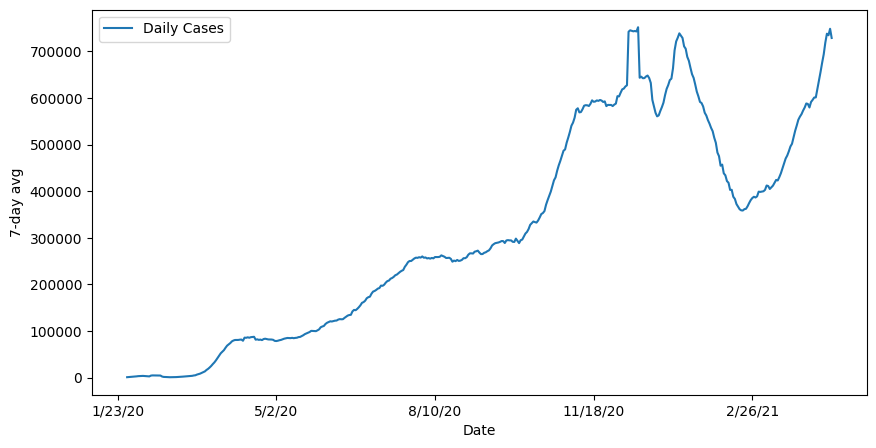

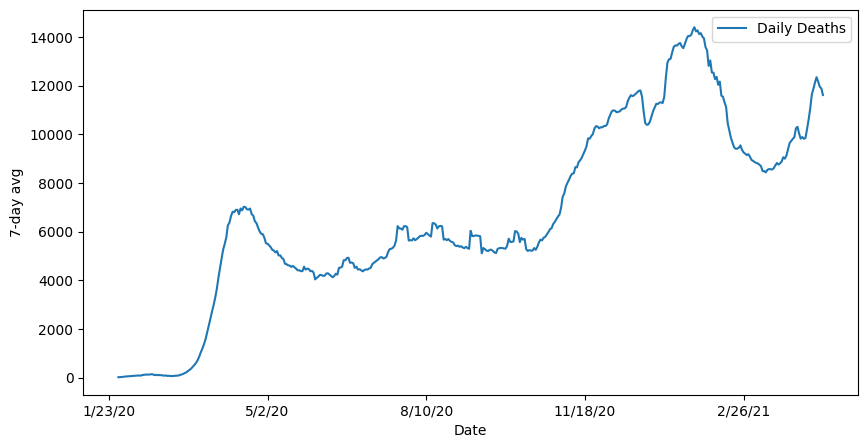

In [9]:

# 확진자, 사망자 일별 추이 
df = pd.DataFrame()
df["Date"] = df0["Date"]
df["Cases"] = df0['DailyTotal']
df['Deaths'] = df1['DailyTotal']

# 날짜를 인덱스로
df=df.set_index("Date")

#df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=7).mean().plot(figsize=(10,5),label="Daily Cases")
plt.xlabel("Date")
plt.ylabel("7-day avg")
plt.legend()
plt.show()

#df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily cases")
df.Deaths.rolling(window=7).mean().plot(figsize=(10,5),label="Daily Deaths")
plt.ylabel("7-day avg")
plt.legend()
plt.show()

In [10]:
'''
# plotly를 이용한 시각화 해봐야 함
fig = ps.make_subplots(
    rows=2, cols=2, shared_xaxes=True, vertical_spacing=0.02, horizontal_spacing=0.02,
    row_heights = [0.7, 0.3], y_title='7-day avg'
)
# 한국
fig.add_trace(go.Scatter(name='korea_cases', x=df.index, y=df['Cases']), row=1, col=1)
fig.add_trace(go.Scatter(name='korea_cases_mean', x=df.index, y=df.Cases.rolling(window=7).mean()), row=1, col=1)
fig.add_trace(go.Scatter(name='korea_deaths', x=df.index, y=df['Deaths']), row=2, col=1)
fig.add_trace(go.Scatter(name='korea_deaths_mean', x=df.index, y=df.Deaths.rolling(window=7).mean()), row=2, col=1)

# 이스라엘
fig.add_trace(go.Scatter(name='Israel_cases', x=df_1.index, y=df_1['Cases']), row=1, col=2)
fig.add_trace(go.Scatter(name='Israel_cases_mean', x=df_1.index, y=df_1.Cases.rolling(window=7).mean()), row=1, col=2)
fig.add_trace(go.Scatter(name='Israel_deaths', x=df_1.index, y=df_1['Deaths']), row=2, col=2)
fig.add_trace(go.Scatter(name='Israel_deaths_mean', x=df_1.index, y=df_1.Deaths.rolling(window=7).mean()), row=2, col=2)

fig.update_layout(height=326*2, width=450*3,)
app = JupyterDash()
app.layout = html.Div([
    html.H3("한국 & 이스라엘 코로나 확진자 및 사망자 현황"),
    dcc.Graph(figure=fig),
])

fig2 = go.Figure()
fig2.add_trace(go.Scatter(name='Korea_vaccine', x=df2['date'], y=df2['total_vaccinations']))
fig2.add_trace(go.Scatter(name='Israel_vaccine', x=df3['date'], y=df3['total_vaccinations']))

app2 = JupyterDash()
app2.layout = html.Div([
    html.H3("한국 & 이스라엘 백신접종 현황"),
    dcc.Graph(figure=fig2),
])

app.run_server(port=8067, mode='inline')
app2.run_server(port=8068, mode='inline')
'''

'\n# plotly를 이용한 시각화 해봐야 함\nfig = ps.make_subplots(\n    rows=2, cols=2, shared_xaxes=True, vertical_spacing=0.02, horizontal_spacing=0.02,\n    row_heights = [0.7, 0.3], y_title=\'7-day avg\'\n)\n# 한국\nfig.add_trace(go.Scatter(name=\'korea_cases\', x=df.index, y=df[\'Cases\']), row=1, col=1)\nfig.add_trace(go.Scatter(name=\'korea_cases_mean\', x=df.index, y=df.Cases.rolling(window=7).mean()), row=1, col=1)\nfig.add_trace(go.Scatter(name=\'korea_deaths\', x=df.index, y=df[\'Deaths\']), row=2, col=1)\nfig.add_trace(go.Scatter(name=\'korea_deaths_mean\', x=df.index, y=df.Deaths.rolling(window=7).mean()), row=2, col=1)\n\n# 이스라엘\nfig.add_trace(go.Scatter(name=\'Israel_cases\', x=df_1.index, y=df_1[\'Cases\']), row=1, col=2)\nfig.add_trace(go.Scatter(name=\'Israel_cases_mean\', x=df_1.index, y=df_1.Cases.rolling(window=7).mean()), row=1, col=2)\nfig.add_trace(go.Scatter(name=\'Israel_deaths\', x=df_1.index, y=df_1[\'Deaths\']), row=2, col=2)\nfig.add_trace(go.Scatter(name=\'Israel_deaths_m

In [11]:
# 갑자기 튀어오른 부분 찾기 
n1=df.Cases.max()
maxindex=df[df.Cases==n1].index
maxindex

Index(['12/10/20'], dtype='object', name='Date')

In [12]:
maxdate=(df0_['Date']=='12/10/20')
df0_[maxdate].iloc[:,1:].values.max()

1498145

In [13]:
df0_.columns.values

array(['Date', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia.1', 'Australia.2', 'Australia.3', 'Australia.4',
       'Australia.5', 'Australia.6', 'Australia.7', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Canada.1', 'Canada.2',
       'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12',
       'Canada.13', 'Canada.14', 'Canada.15', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China.1', 'China.2', 'China.3',
       'China.4', 'China.5', 'China.6', 'China.7', 'China.8', 'China.9',
       'China.10', 'China.11', 'China.12', 

## 나라별 누적 확진자수, 누적 사망자수 

In [14]:
world = pd.DataFrame({"Country":[],"Cases":[], "Deaths":[]})
country_list=list(df0.iloc[:,1:].columns.values)
world["Country"] = country_list
cases = []
deaths = []
for i in world["Country"]:
    cases.append((df0[i][:]).sum())
    deaths.append((df1[i][:]).sum())
world["Cases"]=cases
world["Deaths"]=deaths


In [15]:
# country_list에 한 나라를 여러 개로 나눠 놓은 경우 하나로 합하기 
idx = 0
country_list=list(df0.iloc[:,1:].columns.values)
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list

world = world.groupby("Country")["Cases"].sum().reset_index()

In [16]:
world

,Country,Cases
0,Afghanistan,57721
1,Albania,129456
2,Algeria,119486
3,Andorra,12771
4,Angola,24300
...,...,...
187,Vietnam,2781
188,West Bank and Gaza,279753
189,Yemen,5772
190,Zambia,90844


In [17]:
china=world.Country=='China'
world[china]

,Country,Cases
36,China,101667


In [18]:
world.iloc[0:10,:]

,Country,Cases
0,Afghanistan,57721
1,Albania,129456
2,Algeria,119486
3,Andorra,12771
4,Angola,24300
5,Antigua and Barbuda,1218
6,Argentina,2677747
7,Armenia,207973
8,Australia,29719
9,Austria,591347


In [19]:
world

,Country,Cases
0,Afghanistan,57721
1,Albania,129456
2,Algeria,119486
3,Andorra,12771
4,Angola,24300
...,...,...
187,Vietnam,2781
188,West Bank and Gaza,279753
189,Yemen,5772
190,Zambia,90844


In [20]:
#세계 일일 데이터 파일로 저장하기
world.to_csv('worlddata.csv',index=False)


continent=pd.read_csv("continents2.csv")
continent["name"]=continent["name"].str.upper()
continent
world['Country'].str.upper(), continent['name']
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

# 대륙별로 구분해서 그래프로 나타내고 싶다. 

## 전 세계 30일 예측

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\151272409.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fb["ds"] = pd.to_datetime(df.index)
10:56:47 - cmdstanpy - INFO - Chain [1] start processing
10:56:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

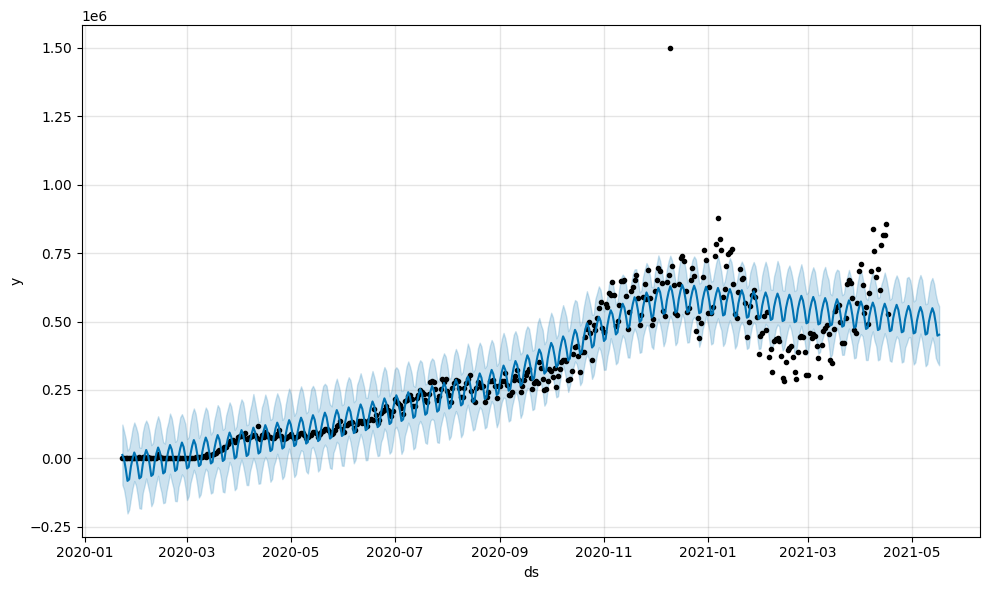

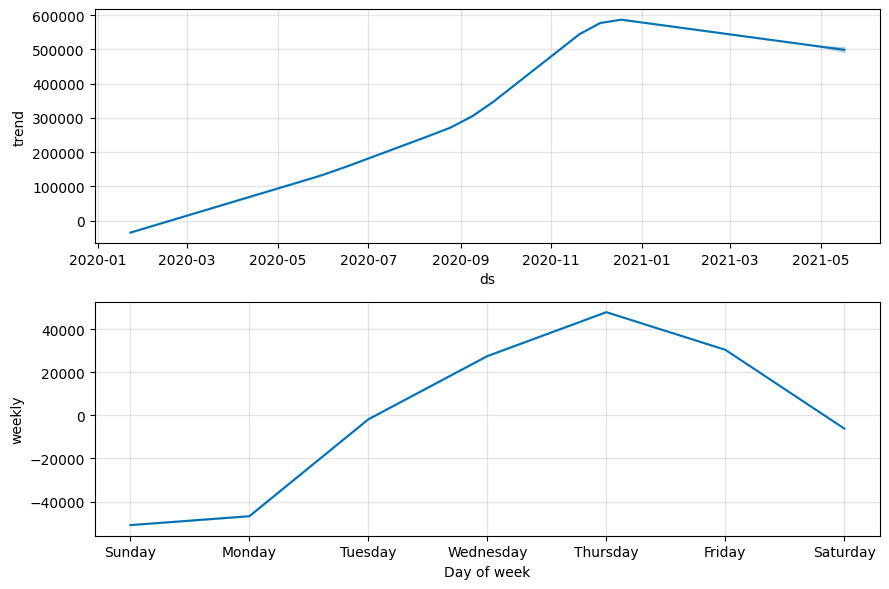

In [21]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model=Prophet()
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\3611546098.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fb["ds"] = pd.to_datetime(df.index)
10:56:48 - cmdstanpy - INFO - Chain [1] start processing
10:56:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a S

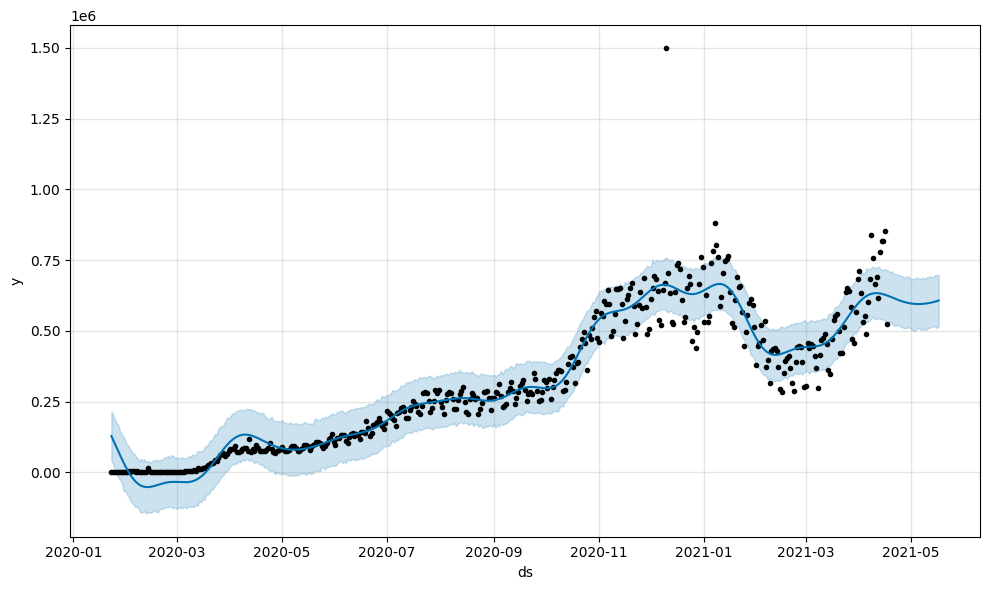

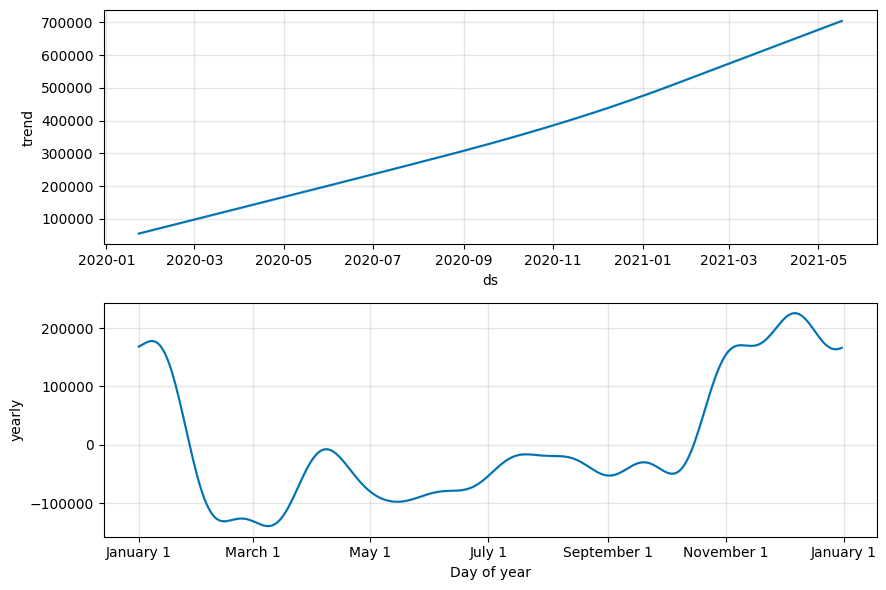

In [22]:
# 파라미터 수정  
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)

df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
model=Prophet(yearly_seasonality=10,weekly_seasonality=False,daily_seasonality=False)
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

10:56:48 - cmdstanpy - INFO - Chain [1] start processing
10:56:49 - cmdstanpy - INFO - Chain [1] done processing


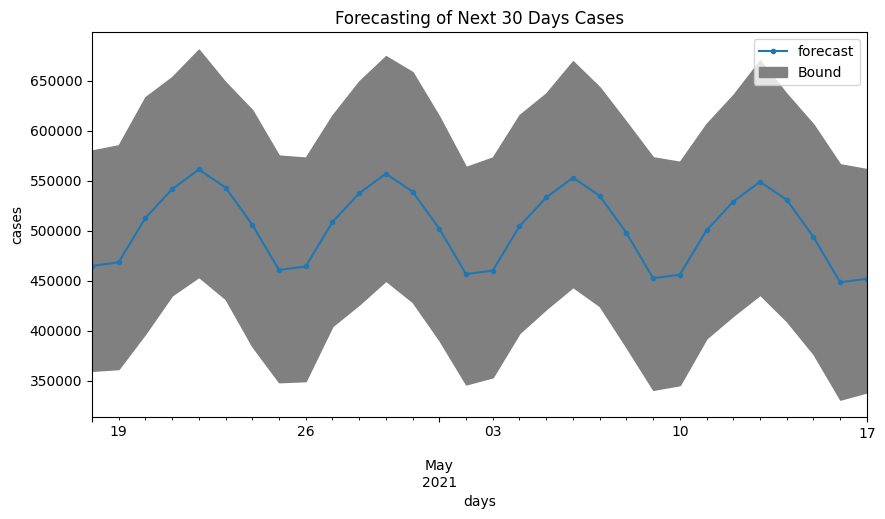

In [23]:
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,
                             daily_seasonality=False,
                             yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

model1 = Fbprophet()
model1.fit(df_fb)
model1.forecast(30,"D")
model1.R2()

forecast = model1.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days Cases")
plt.xlabel('days')
plt.ylabel('cases')
plt.show()

10:56:49 - cmdstanpy - INFO - Chain [1] start processing
10:56:49 - cmdstanpy - INFO - Chain [1] done processing


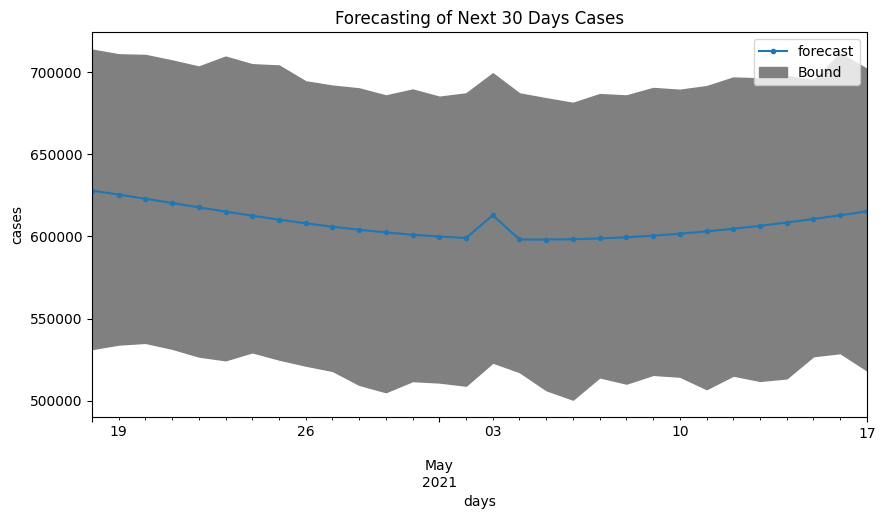

In [24]:
# 아래와 같이 바꿔보았다. 
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)
# add_country_holidays(country_name='UK')
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)
        self.model.add_country_holidays(country_name='UK')
        self.model.fit(self.data)
          
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days Cases")
plt.xlabel('days')
plt.ylabel('cases')
plt.show()

### 한 나라에 대해서~

In [25]:
df.index

Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       ...
       '4/8/21', '4/9/21', '4/10/21', '4/11/21', '4/12/21', '4/13/21',
       '4/14/21', '4/15/21', '4/16/21', '4/17/21'],
      dtype='object', name='Date', length=451)

In [26]:
country_list=list(df0.iloc[:,1:].columns.values)

my_country='United Kingdom'

# <<확진자>>
my_case=pd.DataFrame()
my_case['Date']=df0['Date']

# 한 나라에 대한 데이터만 가져오기
for c in country_list:
    if my_country in c:
        my_case[c]=df0[c]
my_case

,Date,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11
1,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,0,0,0
5,1/27/20,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,0,21,0,7,2,0,0,1,0,0,3,2471
448,4/14/21,0,23,0,0,0,2,13,0,0,0,0,2491
449,4/15/21,0,88,0,0,0,0,0,0,0,0,7,2671
450,4/16/21,0,37,9,2,0,0,1,0,0,0,2,2756


In [27]:
colsize=my_case.columns.size

In [28]:
my_case.iloc[436,1:13] #colsize=13

United Kingdom          0
United Kingdom.1        0
United Kingdom.2        0
United Kingdom.3        0
United Kingdom.4        0
United Kingdom.5        0
United Kingdom.6        0
United Kingdom.7        1
United Kingdom.8        0
United Kingdom.9        0
United Kingdom.10       0
United Kingdom.11    3423
Name: 437, dtype: object

In [29]:
# 하루 확진자 수 더하기
dailytotal = []
for i in range(0,len(my_case)):
    dailytotal.append(sum(my_case.iloc[i,1:colsize].values))
my_case['DailyTotal']=dailytotal
my_case

,Date,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,DailyTotal
1,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1/27/20,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4/13/21,0,21,0,7,2,0,0,1,0,0,3,2471,2505
448,4/14/21,0,23,0,0,0,2,13,0,0,0,0,2491,2529
449,4/15/21,0,88,0,0,0,0,0,0,0,0,7,2671,2766
450,4/16/21,0,37,9,2,0,0,1,0,0,0,2,2756,2807


In [30]:
# <<사망자>>
my_death=pd.DataFrame()
my_death['Date']=df0['Date']

# 한 나라에 대한 데이터만 가져오기
for c in country_list:
    if my_country in c:
        my_death[c]=df1[c]
        
colsize=my_death.columns.size

# 하루 사망자 수 더하기
dailytotal = []
for i in range(0,len(my_death)):
    dailytotal.append(sum(my_death.iloc[i,1:colsize].values))
my_death['DailyTotal']=dailytotal
my_death.tail(30)

,Date,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,DailyTotal
422,3/19/21,0,0,0,0,0,0,0,0,0,0,0,100,100
423,3/20/21,0,0,0,0,0,0,0,0,0,0,0,96,96
424,3/21/21,0,0,0,0,0,0,0,0,0,0,1,33,34
425,3/22/21,0,0,0,0,0,0,0,0,0,0,1,17,18
426,3/23/21,0,0,0,0,0,0,0,0,0,0,0,112,112
427,3/24/21,0,0,0,0,0,0,0,0,0,0,0,98,98
428,3/25/21,0,0,0,0,0,0,0,0,0,0,0,63,63
429,3/26/21,0,0,0,0,0,0,0,1,0,0,0,70,71
430,3/27/21,0,0,0,0,0,0,0,0,0,0,0,58,58
431,3/28/21,0,0,0,0,0,0,0,2,0,0,0,19,21


In [31]:
# 한 나라에 대한 일별 확진자수와 사망자수 

df=pd.DataFrame()
df['Date']=my_case['Date']
df['Cases']=my_case['DailyTotal']
df['Deaths']=my_death['DailyTotal']
df=df.set_index('Date')
df

,Cases,Deaths
Date,,
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
1/27/20,0,0
...,...,...
4/13/21,2505,23
4/14/21,2529,38
4/15/21,2766,31


In [32]:
### 그래프로 나타내기

United Kingdom Daily Covid19 Cases


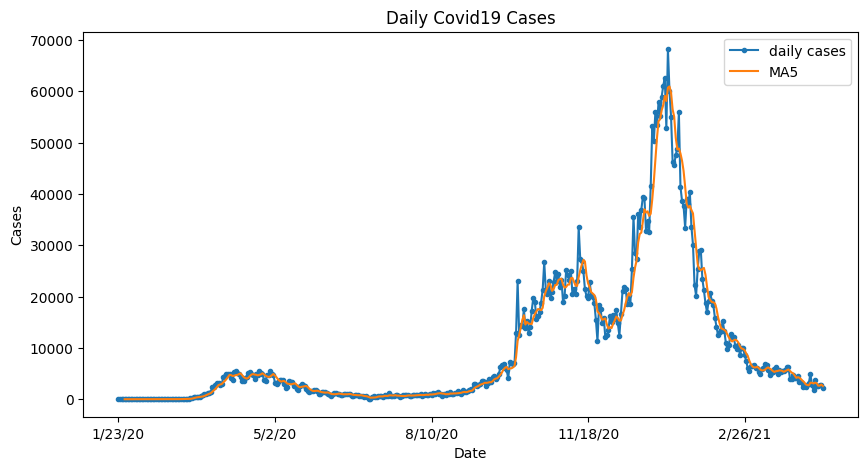

In [33]:
# 확진자 그래프
print(my_country,"Daily Covid19 Cases")
df.Cases.plot(title="Daily Covid19 Cases",
              marker=".",figsize=(10,5),label="daily cases")
# 5일 평균선  
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),
                                        label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

United Kingdom Daily Covid19 Deahts


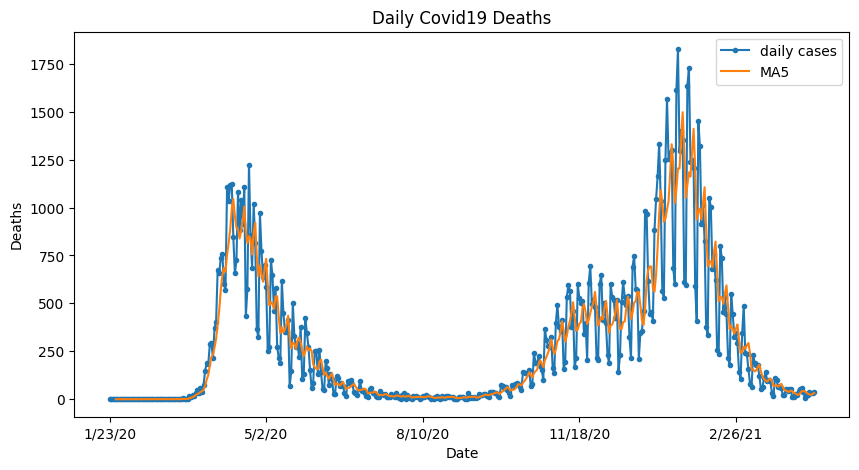

In [34]:
# 사망자 그래프
print(my_country,"Daily Covid19 Deahts")
df.Deaths.plot(title="Daily Covid19 Deaths",
              marker=".",figsize=(10,5),label="daily cases")
# 5일 평균선  
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),
                                        label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [35]:
df.Deaths.tail()

Date
4/13/21    23
4/14/21    38
4/15/21    31
4/16/21    34
4/17/21    36
Name: Deaths, dtype: int32

United Kingdom Daily Covid19 Cases & Deahts


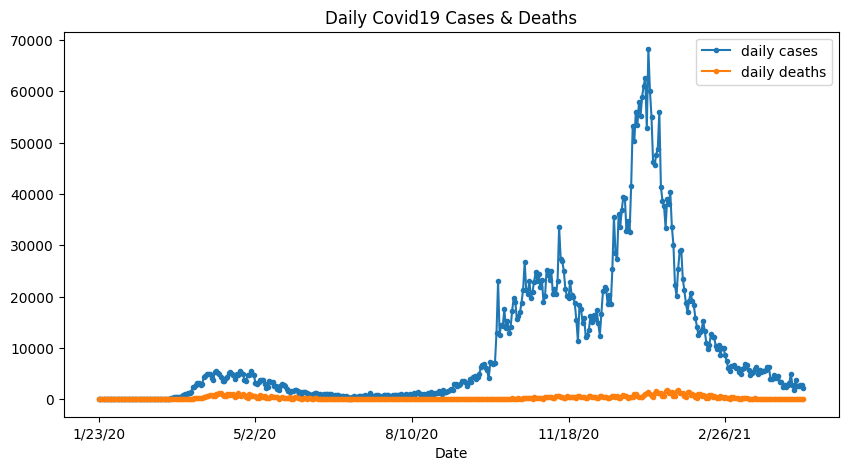

In [36]:
#확진자와 사망자 함께
print(my_country,"Daily Covid19 Cases & Deahts")
df.Cases.plot(title="Daily Covid19 Cases & Deaths",
              marker=".",figsize=(10,5),label="daily cases")
df.Deaths.plot(marker=".",figsize=(10,5),label="daily deaths")

plt.legend()
plt.show()
# 확진자와 사망자수를 같이 보면 안 되겠다. 

## 페이스북 예측 모델 적용

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\3249439787.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fb["ds"] = pd.to_datetime(df.index)
10:56:51 - cmdstanpy - INFO - Chain [1] start processing
10:56:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a S

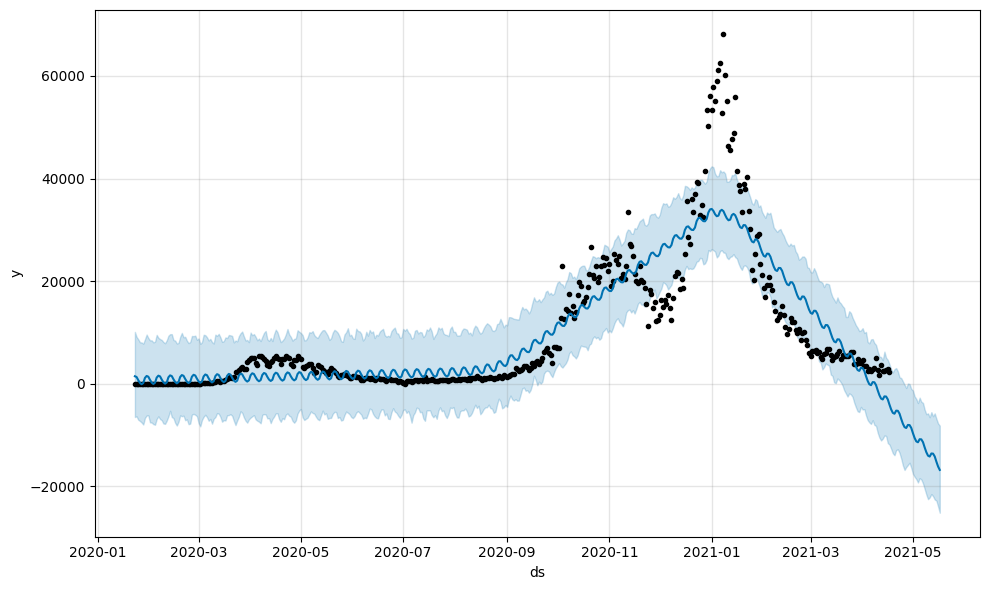

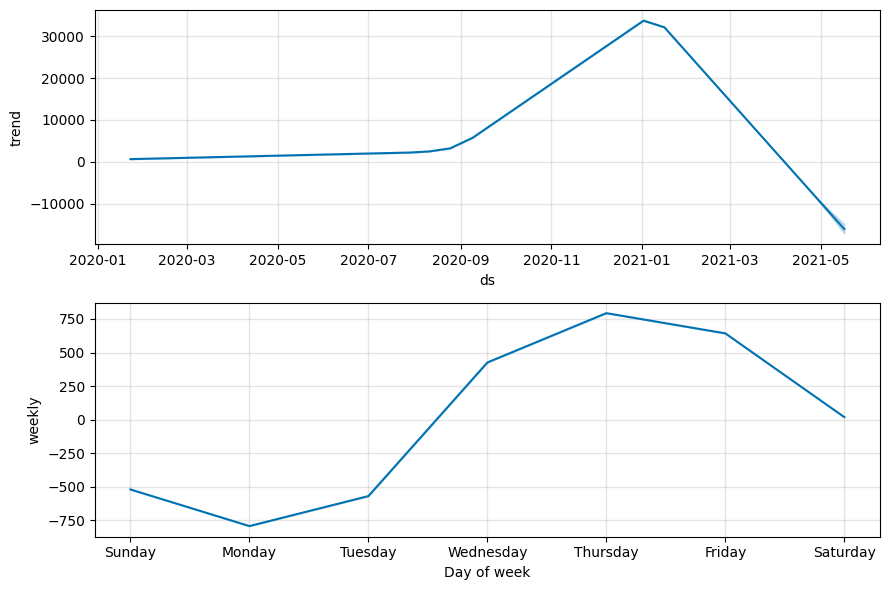

In [37]:
# 확진자 예측 
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model=Prophet()
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)

forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)
# 예측이 마이너스다. 
# 0밑으로 내려가지 못하게 하려면 어떻게 해야 할까? 

10:56:52 - cmdstanpy - INFO - Chain [1] start processing
10:56:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureW

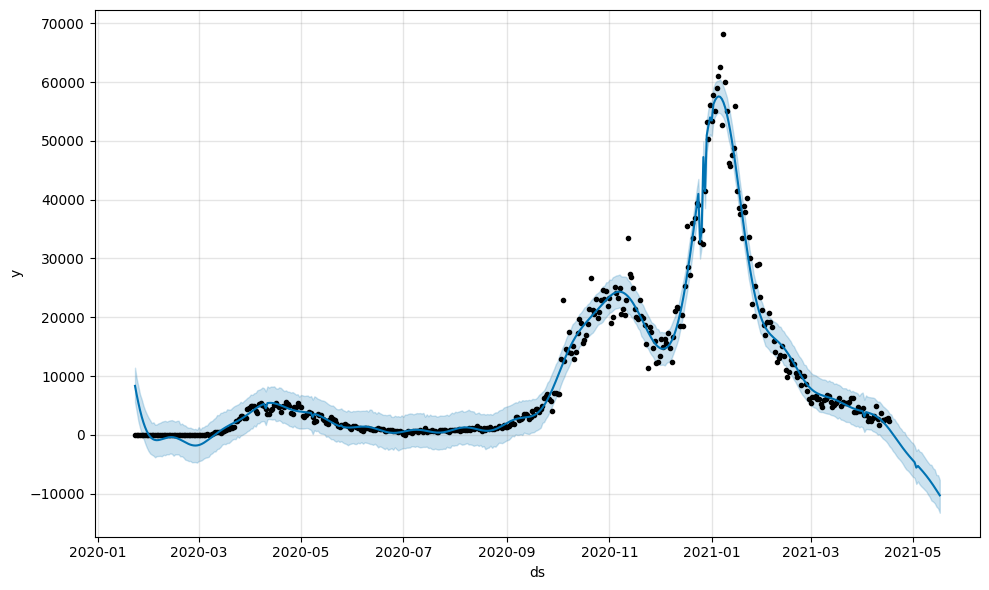

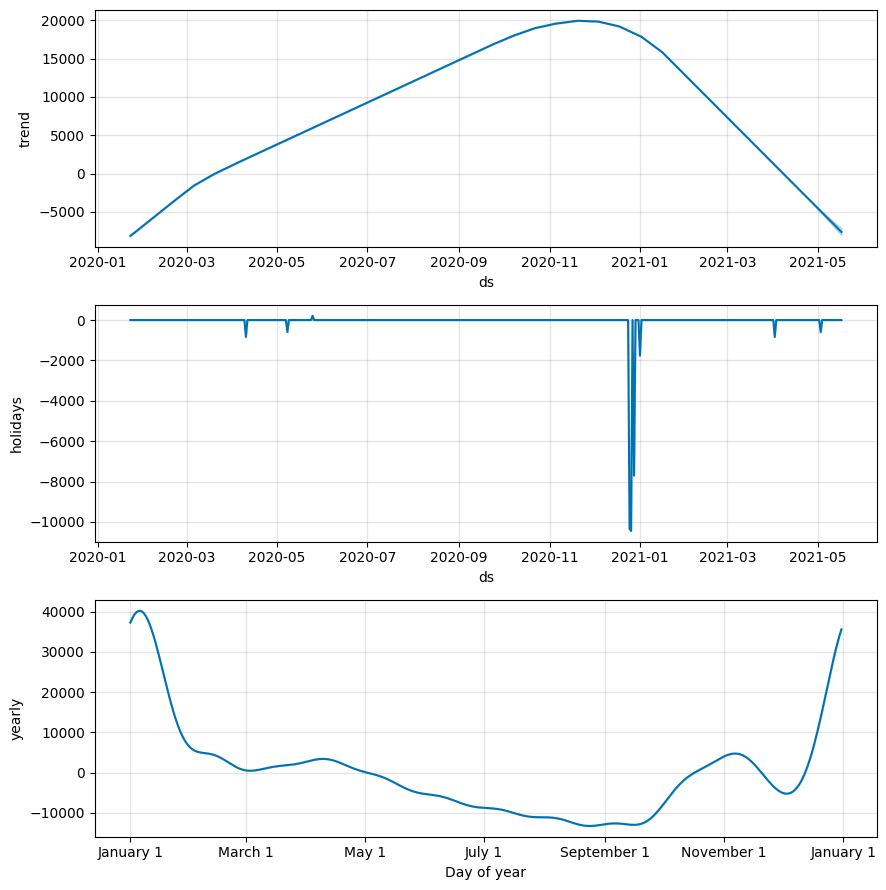

In [38]:
# 파라미터 수정  
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)
# model.add_country_holidays(country_name='UK')
model=Prophet(yearly_seasonality=12,weekly_seasonality=False,daily_seasonality=False)
model.add_country_holidays(country_name='UK')
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

10:56:53 - cmdstanpy - INFO - Chain [1] start processing
10:56:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureW

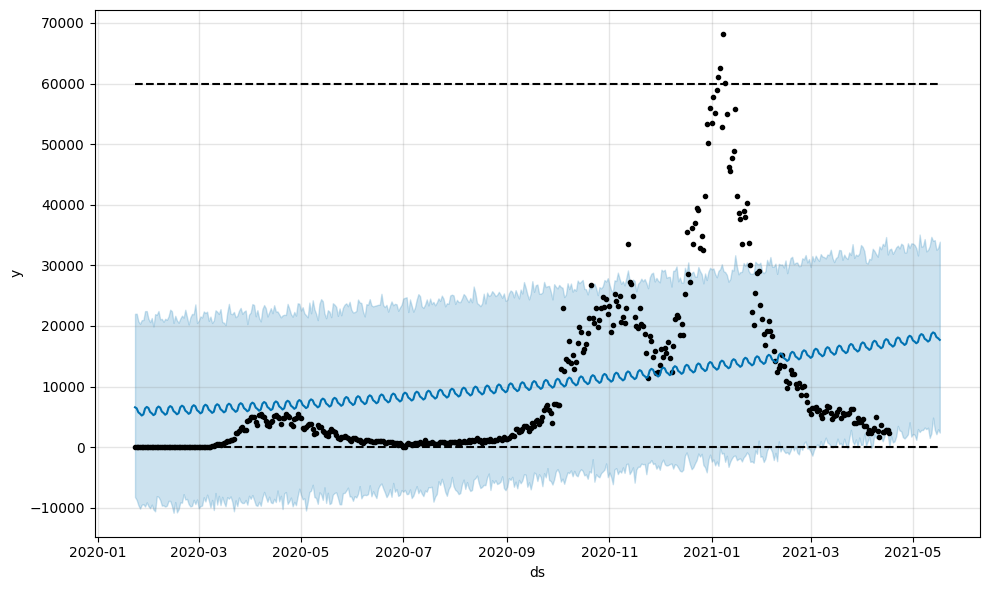

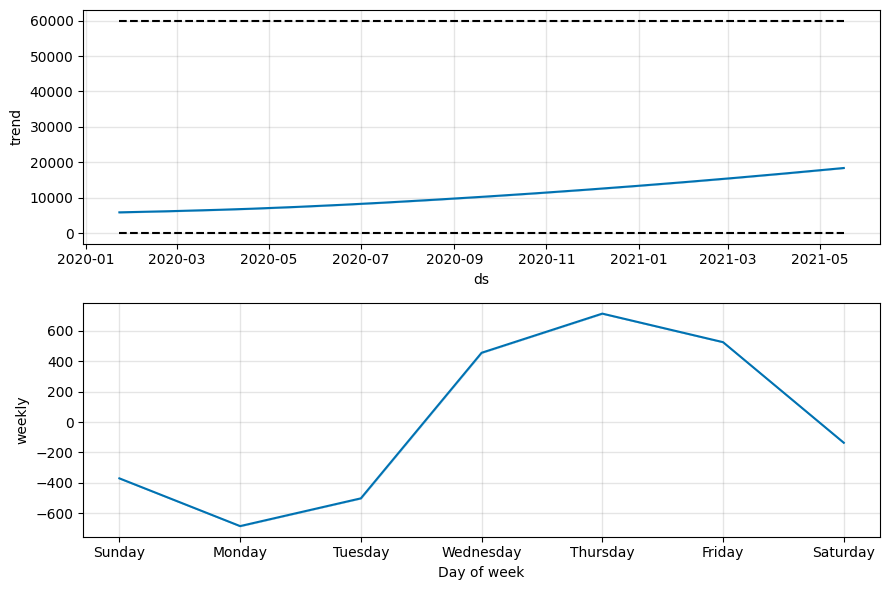

In [39]:
# 로지스틱으로 바꿔보기
# 상한선 & 하한선 임의 설정
df_fb['cap'] = 60000
df_fb['floor'] = 0

model = Prophet(growth='logistic') # default = linear
model.fit(df_fb)
future = model.make_future_dataframe(periods=30) # 30일 날짜 지정
future.tail()

# 상한선 & 하한선 => future에 똑같이 적용
future['cap'] = 60000.0
future['floor'] = 0.0
 
forecast = model.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

model.plot(forecast)
model.plot_components(forecast)
plt.show()
#로지스틱으로 하면 안 된다. 

10:56:54 - cmdstanpy - INFO - Chain [1] start processing
10:56:54 - cmdstanpy - INFO - Chain [1] done processing


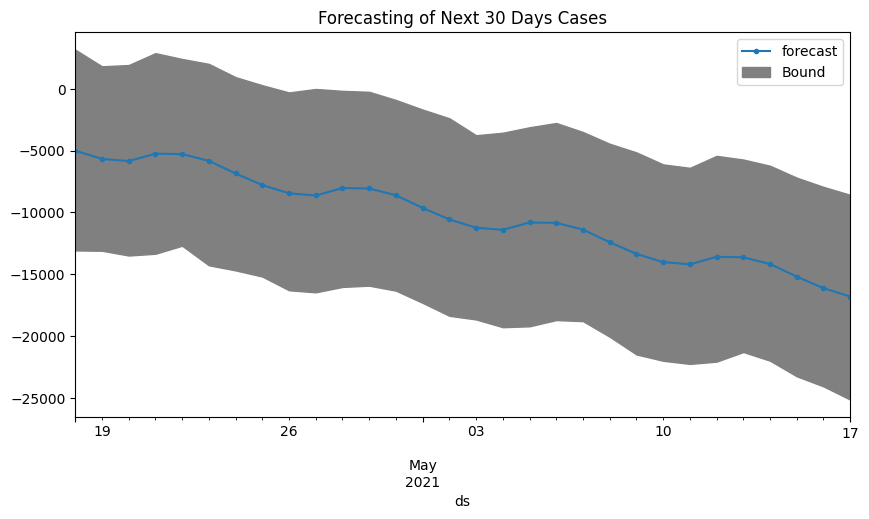

In [40]:
# 캐글 - 예측 그래프(30일)만 보이게
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]]. \
    tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()
# 예측 직전 확진자수 3424명인데 예측값이 0보다 작다. 맞지 않다. 

In [41]:
# 아래와 같이 바꿔보았다. 
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)
# add_country_holidays(country_name='UK')
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)
        self.model.add_country_holidays(country_name='UK')
        self.model.fit(self.data)
          
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)

forecast

10:56:55 - cmdstanpy - INFO - Chain [1] start processing
10:56:55 - cmdstanpy - INFO - Chain [1] done processing


,yhat_lower,yhat_upper,yhat
ds,,,
2021-04-18,-2219.876604,3477.019629,536.911199
2021-04-19,-2549.900907,2685.893010,144.965102
2021-04-20,-3104.841084,2578.209624,-254.825611
2021-04-21,-3496.722661,2093.794797,-658.555878
2021-04-22,-3863.584316,1831.168295,-1062.500500
2021-04-23,-4373.403454,1075.474088,-1463.264223
2021-04-24,-4583.153915,999.905578,-1857.915492
2021-04-25,-5095.464945,532.102448,-2244.098072
2021-04-26,-5433.244993,186.627893,-2620.115762


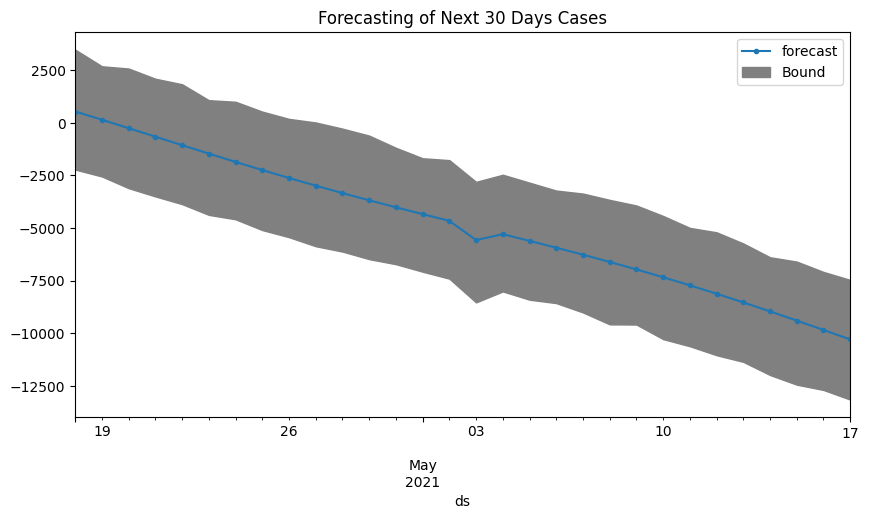

In [42]:
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()


# 영국의 명절을 넣고 일별, 주별은 false, 년별은 10을 넣고 하니 그래프가 괜찮네...
# 확진자수가 0 아래로 내려가면 종식되게 바꿔보자!

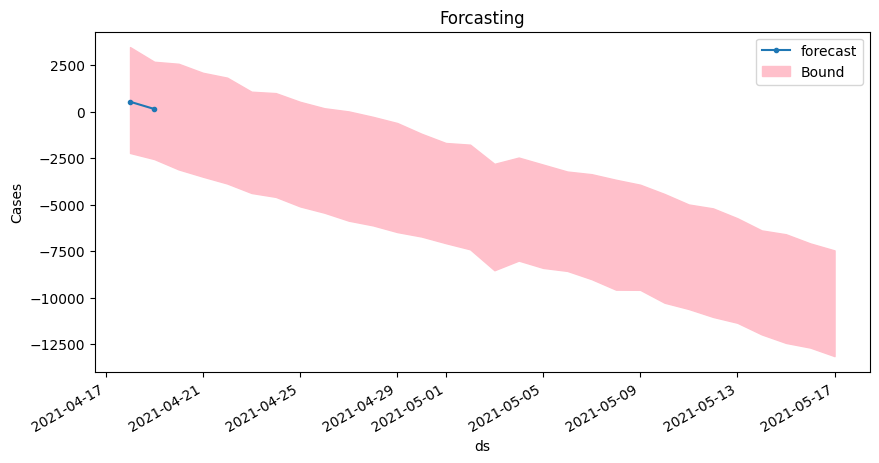

In [43]:
# 확진자수가 0아래로 내려가면 종식!
forecast0=(forecast['yhat']>0)
forecast1=(forecast['yhat']<0)
forecast[forecast0]["yhat"].plot(marker=".",figsize=(10,5))

plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="pink")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forcasting")
plt.ylabel("Cases")
plt.show()


In [44]:
forecast[forecast1].iloc[0].name

Timestamp('2021-04-20 00:00:00')

In [45]:
# 종식일은 2021-04-23

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\1782255413.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fb["ds"] = pd.to_datetime(df.index)
10:56:56 - cmdstanpy - INFO - Chain [1] start processing
10:56:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a S

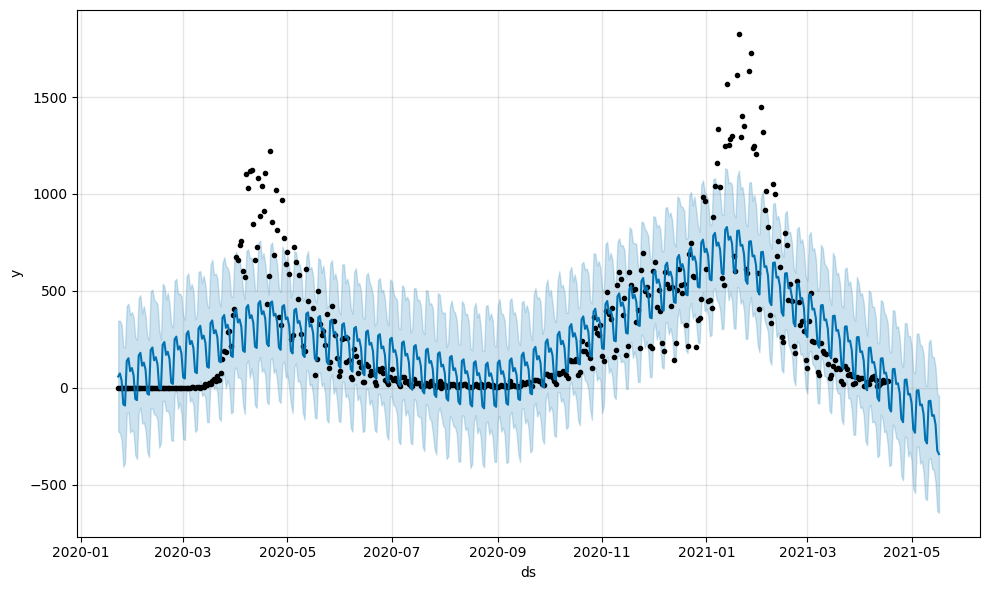

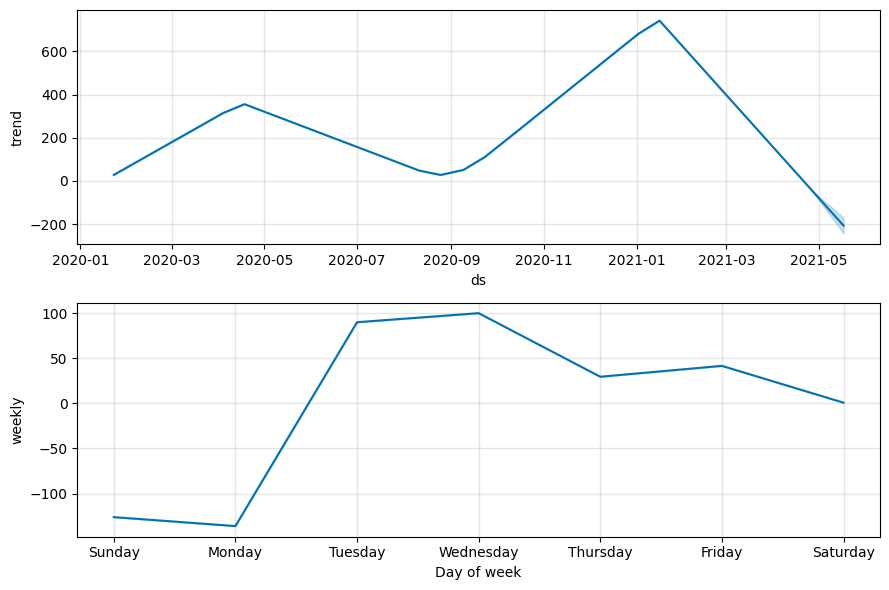

In [46]:
### 사망자수 예측 

df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,1].values


model=Prophet()
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_5504\862770445.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fb["ds"] = pd.to_datetime(df.index)
10:56:57 - cmdstanpy - INFO - Chain [1] start processing
10:56:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

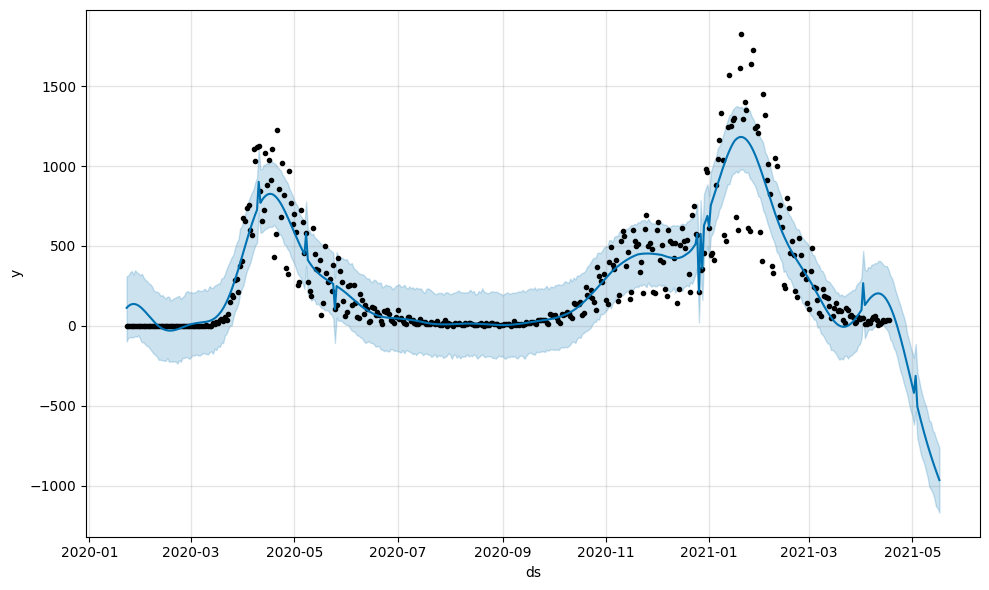

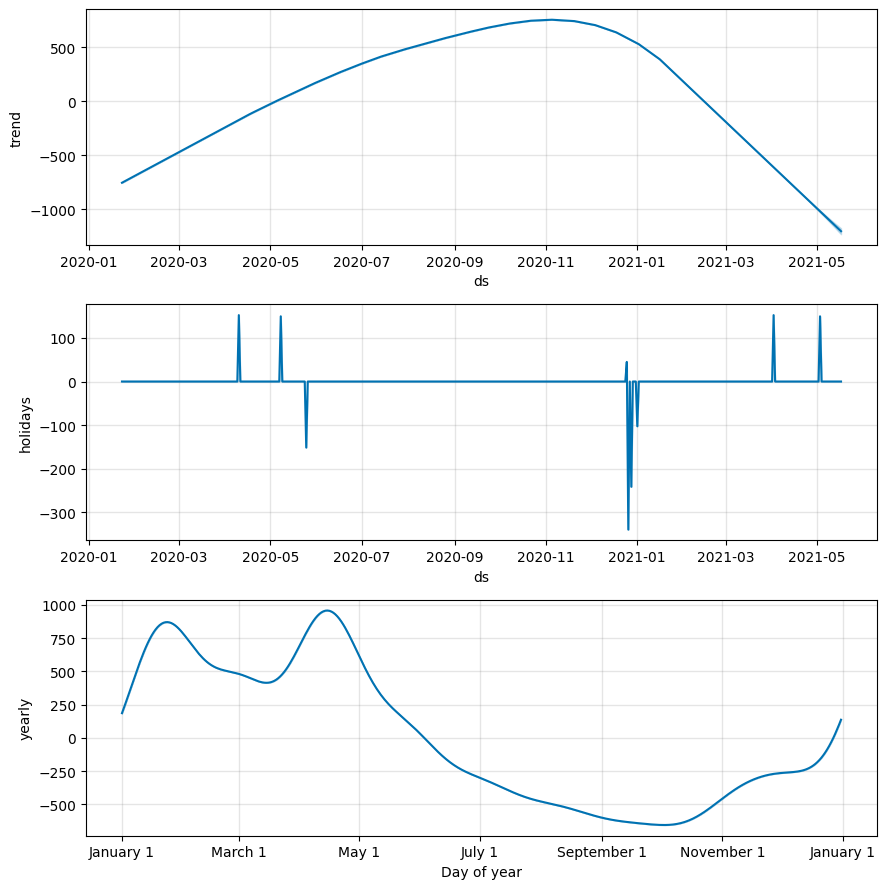

In [47]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,1].values

# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)

model=Prophet(yearly_seasonality=10,weekly_seasonality=False,daily_seasonality=False)
model.add_country_holidays(country_name='UK')
model.fit(df_fb)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

10:56:58 - cmdstanpy - INFO - Chain [1] start processing
10:56:58 - cmdstanpy - INFO - Chain [1] done processing


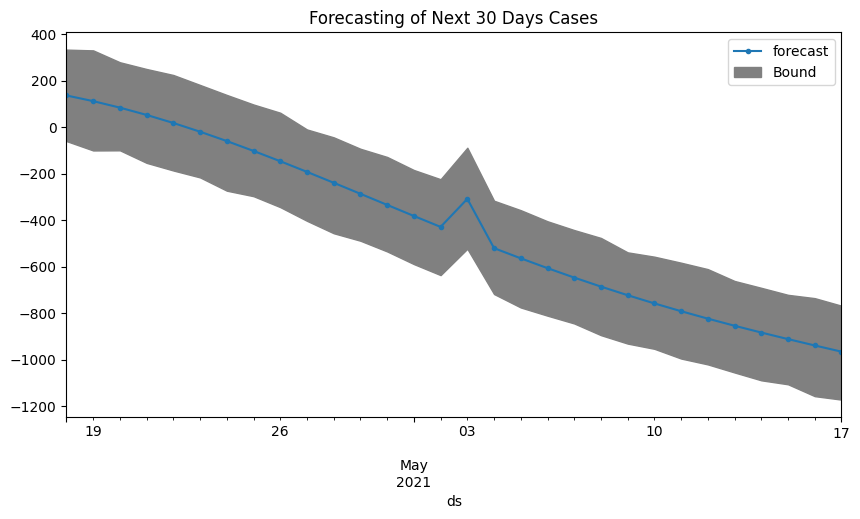

In [48]:
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=10)
# add_country_holidays(country_name='UK')
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)
        self.model.add_country_holidays(country_name='UK')
        self.model.fit(self.data)
          
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)

forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()